# DEPENDENCY PARSING USING STANZA

# 9.1 SIMPLE DEPENDENCY PARSING PROGRAM

In [7]:
!pip install stanza


In [8]:
import stanza
stanza.download('en')

2025-07-30 08:48:30 INFO: Downloading default packages for language: en (English) ...


2025-07-30 08:49:04 INFO: Finished downloading models and saved to C:\Users\2mscds34\stanza_resources.


In [10]:
nlp=stanza.Pipeline('en')
sentence="The quick brown fox jumps over the lazy dog."
doc=nlp(sentence)

2025-07-30 08:52:12 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-07-30 08:52:13 INFO: Loading these models for language: en (English):
| Processor    | Package             |
--------------------------------------
| tokenize     | combined            |
| pos          | combined_charlm     |
| lemma        | combined_nocharlm   |
| constituency | ptb3-revised_charlm |
| depparse     | combined_charlm     |
| sentiment    | sstplus             |
| ner          | ontonotes_charlm    |

2025-07-30 08:52:13 INFO: Using device: cpu
2025-07-30 08:52:13 INFO: Loading: tokenize
2025-07-30 08:52:13 INFO: Loading: pos
2025-07-30 08:52:13 INFO: Loading: lemma
2025-07-30 08:52:13 INFO: Loading: constituency
2025-07-30 08:52:13 INFO: Loading: depparse
2025-07-30 08:52:14 INFO: Loading: sentiment
2025-07-30 08:52:14 INFO: Loading: ner
2025-07-30 08:52:14 INFO: Done loading processors!


In [12]:
print("Word\tHead\tRelation")
for sent in doc.sentences:
    for word in sent.words:
        head = sent.words[word.head - 1].text if word.head > 0 else "ROOT"
        print(f"{word.text}\t{head}\t{word.deprel}")

Word	Head	Relation
The	fox	det
quick	fox	amod
brown	fox	amod
fox	jumps	nsubj
jumps	ROOT	root
over	dog	case
the	dog	det
lazy	dog	amod
dog	jumps	obl
.	jumps	punct


# 9.2. Advanced Dependency Tree Visualization using networkx + matplotlib

In [13]:
import stanza
import networkx as nx
import matplotlib.pyplot as plt

2025-07-30 09:04:48 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-07-30 09:04:50 INFO: Loading these models for language: en (English):
| Processor    | Package             |
--------------------------------------
| tokenize     | combined            |
| pos          | combined_charlm     |
| lemma        | combined_nocharlm   |
| constituency | ptb3-revised_charlm |
| depparse     | combined_charlm     |
| sentiment    | sstplus             |
| ner          | ontonotes_charlm    |

2025-07-30 09:04:50 INFO: Using device: cpu
2025-07-30 09:04:50 INFO: Loading: tokenize
2025-07-30 09:04:50 INFO: Loading: pos
2025-07-30 09:04:50 INFO: Loading: lemma
2025-07-30 09:04:50 INFO: Loading: constituency
2025-07-30 09:04:50 INFO: Loading: depparse
2025-07-30 09:04:50 INFO: Loading: sentiment
2025-07-30 09:04:51 INFO: Loading: ner
2025-07-30 09:04:51 INFO: Done loading processors!


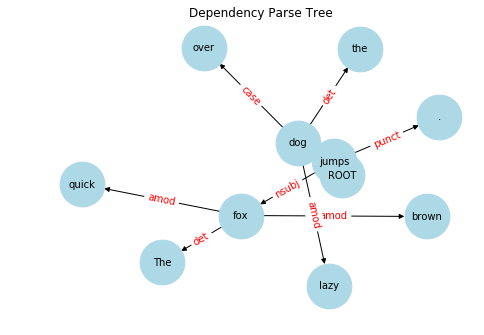

In [15]:
# Load NLP pipeline
nlp = stanza.Pipeline('en')
sentence = "The quick brown fox jumps over the lazy dog."
doc = nlp(sentence)
G = nx.DiGraph()
for sent in doc.sentences:
    for word in sent.words:
        head_text = "ROOT" if word.head == 0 else sent.words[word.head-1].text
        G.add_edge(head_text, word.text, label=word.deprel)
# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'label')
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue',
font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')
plt.title("Dependency Parse Tree")
plt.show()

# 10. Word Sense Disambiguation (WSD)
Program 10.1: Simple WSD using Lesk Algorithm

In [20]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk.wsd import lesk
from nltk.tokenize import word_tokenize
sentence = "I went to the bank to deposit money."
tokens = word_tokenize(sentence)
sense = lesk(tokens, 'bank')
print("Sense:", sense)
print("Definition:", sense.definition())

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\2mscds34\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\2mscds34\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Sense: Synset('savings_bank.n.02')
Definition: a container (usually with a slot in the top) for keeping money at home


# Program 10.2: Advanced WSD with Multiple Words

In [23]:
sentences = ["The crane is flying.", "He used a crane to lift the load."]
for sent in sentences:
    tokens = word_tokenize(sent)
    sense = lesk(tokens, 'crane')
print("Sentence:", sent)
print("Sense:", sense)
print("Definition:", sense.definition())

Sentence: He used a crane to lift the load.
Sense: Synset('grus.n.01')
Definition: a small constellation in the southern hemisphere near Phoenix
